# **Foreign Exchange Rate Prediction**

Mahade Mishuk

**Data:** The time seriese I use can be found at, https://data.humdata.org/dataset/ecb-fx-rates?force_layout=desktop. This dataset contains foreign exchange rates quoted by the European Central Bank (ECB), where all rates are converted relative to the USD (USD/x). This means the values represent the exchange rate between USD and other currencies, i.e., how much 1 USD is worth in terms of another currency (USD to x)

Overview of the dataset: \\
Date: The first column represents the date for which the exchange rates are provided. We got data from Januay 4th, 1999 to today (Updated data).

Exchange Rates: The remaining columns represent the exchange rates for various currencies relative to USD. Each number in these columns tells you how many units of a specific currency you can buy with 1 USD.

Missing Data: Some columns/cells have 0.0 values, which indicates either missing data or currencies that weren't available for that date.

**The main objecive of the project to build ML model that can predict foreign exchange rate for the future (next day or even 5 years later) with the highest accuracy.**

---


Methods were used


*   Deep Learning Model
  1.   Prophet
  2.   LSTM (Long Short-Term Memory)

*   Machine Learning Model
    1.   Random Forest



### **Data Preparation and Cleaning**

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [411]:
data = pd.read_csv('ECB_FX_USD-base.csv')
#drop 1st row
data = data.drop(0)
data

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2024-10-04,0.9067005168192946,146.60440656451175,1.7733248707951763,22.98213799981866,6.762081784386617,0.7592256777586364,363.8861184150875,3.9119593798168464,4.512557802157947,...,3.81013691177804,83.96908151237646,1340.320971982954,19.284431952126212,4.2199655453803615,1.612022848853024,56.32967630791549,1.2978511197751383,33.08006165563515,17.482001994741136
2,2024-10-03,0.9058791557206268,146.73430564362712,1.7717184527584018,22.970377751607934,6.757405562098016,0.7632756590270857,363.64706948093124,3.9005344687018746,4.508198206359271,...,3.7919195579309717,83.99583295588367,1334.2603496693541,19.51164054715101,4.221487453573693,1.6078449134885404,56.44985958873085,1.2967660114140773,33.12528308723616,17.485007699972822
3,2024-10-02,0.9032607713846987,144.75657122211183,1.7665974166741938,22.866949688375033,6.7376930719898835,0.7523078312708879,360.8797759913287,3.879505013097281,4.494896576641676,...,3.786198175413242,83.9842832625779,1321.0459759732635,19.517929726311987,4.173516394183,1.5910035227170085,56.17017432932888,1.2885918164574113,32.78475295817903,17.397254087254993
4,2024-10-01,0.9020386072523904,143.75789283781347,1.764207108064225,22.79631968248241,6.727223525166877,0.750432978531481,358.85801912321847,3.8655060436586686,4.4884539058271695,...,3.721991701244813,83.82734981057189,1320.575500631427,19.704492152264116,4.164531841962836,1.5828973480064945,56.185278729929635,1.2870286848277106,32.58524264838535,17.28170665704492
5,2024-09-30,0.8931761343336907,142.74740978921042,1.746873883529832,22.493747767059666,6.659521257591998,0.7461861379063952,354.48374419435515,3.821722043586996,4.443819221150411,...,3.705877098963916,83.79153269024653,1312.1739907109682,19.635762772418722,4.12352625937835,1.5734190782422295,56.037870668095756,1.2809932118613792,32.24991068238657,17.172025723472668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,1999-01-08,0.8577064928381508,111.57903765331504,0.0,29.966549446779315,6.384166738142208,0.6084569860193842,214.55527918346343,3.461960717042628,0.0,...,0.0,0.0,1172.253194956686,0.0,0.0,1.8489578866112018,0.0,1.6757011750578952,0.0,5.819967407153272
6595,1999-01-07,0.859697386519945,111.27063273727649,0.0,29.9914030261348,6.398813617606603,0.6068174002751031,215.00171939477303,3.452974552957359,0.0,...,0.0,0.0,1149.5529573590097,0.0,0.0,1.8510144429160933,0.0,1.670907840440165,0.0,5.8702716643741395
6596,1999-01-06,0.8515711487694798,111.91348037128502,0.0,29.67725453461637,6.34011751681853,0.6025717448692839,213.46333986204547,3.4118198075449206,0.0,...,0.0,0.0,1157.7450395980584,0.0,0.0,1.8640892446563913,0.0,1.6775100059609982,0.0,5.731669931022737
6597,1999-01-05,0.8481764206955046,111.0771840542833,0.0,29.615776081424936,6.318490245971161,0.6040712468193384,212.72264631043257,3.4134860050890583,0.0,...,0.0,0.0,1164.5547073791347,0.0,0.0,1.8669211195928752,0.0,1.6670907548770144,0.0,5.765479219677693


In [412]:
data.shape

(6598, 34)

In [413]:
data['Date'] = pd.to_datetime(data['Date'])

## **Prophet Model**

### USD to Hungarian Forint

Just use a currency code (e.g. EUR for Euro), run the model and get the forecasting prediction. And also you can change the period of time you want to get forecast.

In [388]:
df = data[['Date','HUF']]
p = Prophet()
df.columns = ['ds','y']

In [389]:
ProphetModel = p.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq19rxfu5/1rapegqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq19rxfu5/fz8q7tl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33982', 'data', 'file=/tmp/tmpq19rxfu5/1rapegqu.json', 'init=/tmp/tmpq19rxfu5/fz8q7tl7.json', 'output', 'file=/tmp/tmpq19rxfu5/prophet_modelu290z2q1/prophet_model-20241008030319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:03:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:03:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [390]:
futurePrediction = p.make_future_dataframe(periods=30,freq='D') #you can use any period of time e.g. 1 = 1day, 30=30days/1 month, 365=1year
forecast_Currrency = p.predict(futurePrediction)
forecast_Currrency.tail()
##look at the yhat value

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6623,2024-10-30,378.942698,363.977602,399.300387,378.942698,378.942698,3.053035,3.053035,3.053035,0.991494,0.991494,0.991494,2.061541,2.061541,2.061541,0.0,0.0,0.0,381.995733
6624,2024-10-31,378.988886,363.727171,399.115773,378.988886,378.988886,3.045425,3.045425,3.045425,0.983669,0.983669,0.983669,2.061756,2.061756,2.061756,0.0,0.0,0.0,382.034311
6625,2024-11-01,379.035075,364.053429,399.821990,379.035075,379.035075,3.079784,3.079784,3.079784,1.011070,1.011070,1.011070,2.068715,2.068715,2.068715,0.0,0.0,0.0,382.114859
6626,2024-11-02,379.081263,361.790989,396.465210,379.081263,379.081263,-0.372721,-0.372721,-0.372721,-2.455270,-2.455270,-2.455270,2.082549,2.082549,2.082549,0.0,0.0,0.0,378.708543
6627,2024-11-03,379.127452,360.907148,397.405692,379.127452,379.127452,-0.352064,-0.352064,-0.352064,-2.455270,-2.455270,-2.455270,2.103206,2.103206,2.103206,0.0,0.0,0.0,378.775388


Interactive graph of the output

In [391]:
plot_plotly(p, forecast_Currrency)

You can also see weekly, monthly, yealy trend

In [392]:
plot_components_plotly(p, forecast_Currrency)

## **LSTM (Long Short-Term Memory) Model**

### USD to Euro

LSTMs also use for time series forecasting because they can learn patterns very effectively from sequences of data.

In [414]:
data = data.iloc[::-1].reset_index(drop=True)  # Reverse
data = data.set_index('Date')

In [452]:
scaler = MinMaxScaler()               #Normalize the data
scaled_data = scaler.fit_transform(data)

timeStep = 10                         # Number of time steps in each sequence
num_features = len(data.columns)      # Number of colums fetures

In [458]:
n = []
labels = []
for i in range(len(scaled_data) - timeStep):
    seq = scaled_data[i:i+timeStep]
    label = scaled_data[i+timeStep][data.columns.get_loc('EUR')]   #use column/currency name
    n.append(seq)
    labels.append(label)

sequences = np.array(n)
labels = np.array(labels)

In [460]:
#split test-train data
train_size = int(0.8 * len(sequences))                     #Split data; use the head (first 80%) for training, and the tail (last 20%) for testing
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

In [463]:
#Creating LSTM model
LSTMmodel = Sequential()

#LSTM layers and dropout
LSTMmodel.add(LSTM(units=128,input_shape=(train_x.shape[1],train_x.shape[2]),return_sequences=True))
LSTMmodel.add(LSTM(units=64, return_sequences=True))
LSTMmodel.add(LSTM(units=32, return_sequences=False))
LSTMmodel.add(Dropout(0.3))
LSTMmodel.add(Dropout(0.3))
LSTMmodel.add(Dropout(0.3))

#Adding dense output layer
LSTMmodel.add(Dense(units=1))

#Compiling the model
LSTMmodel.compile(optimizer='adam', loss='mean_squared_error')

#batch size
batch_size = 64

In [464]:
LSTMmodel.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 10, 128)             │          82,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,801 (565.63 KB)

 Trainable params: 144,801 (565.63 KB)

 Non-trainable params: 0 (0.00 B)

In [467]:
#callbacks
erlyStoping = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=100)
checkPoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

#Train the model
histry = LSTMmodel.fit(train_x, train_y,
                        epochs=100,                #Larger epochs for better training
                        batch_size=128,
                        validation_split=0.3,      # Use part of the training data as validation
                        callbacks=[erlyStoping, checkPoint])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0580 - val_loss: 0.0163
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0161 - val_loss: 0.0154
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0143 - val_loss: 0.0061
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.0125 - val_loss: 0.0040
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - loss: 0.0117 - val_loss: 0.0052
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0109 - val_loss: 0.0085
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0106 - val_loss: 0.0028
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0092 - val_loss: 0.0049
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0087 - val_loss: 0.0014
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0084 - val_loss: 0.0058
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 1

In [468]:
#Evaluate the best model on the test set
BestModel = tf.keras.models.load_model('best_model.keras')
TestLoss = BestModel.evaluate(test_x, test_y)
print("Test Loss:", TestLoss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.1957e-04
Test Loss: 0.0013082033256068826


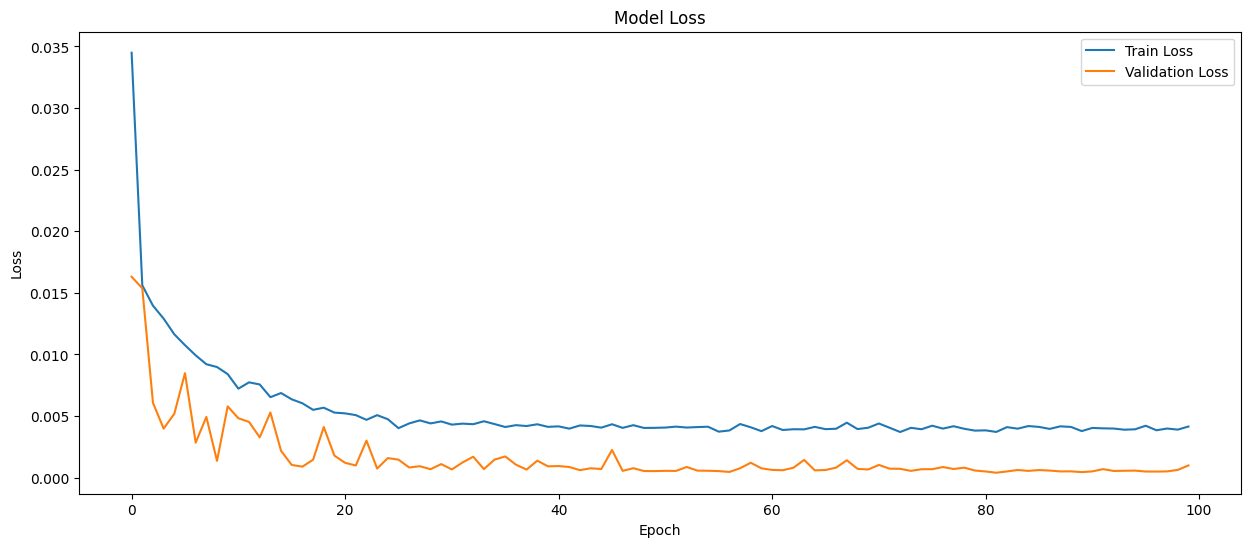

In [469]:
# Plot training & validation loss
plt.plot(histry.history['loss'], label='Train Loss')
plt.plot(histry.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [470]:
#Predictions and evaluation metrics
LSTMprediction = BestModel.predict(test_x)

#Inverse transform for original scale
Test_yCopy = np.repeat(test_y.reshape(-1, 1), num_features, axis=-1)  # Repeat for all features
TrueValue = scaler.inverse_transform(Test_yCopy)[:, data.columns.get_loc('EUR')]

#Predicted values
LSTMpredictionCopy = np.repeat(LSTMprediction, num_features, axis=-1)  # Repeat for all features
predictedValue = scaler.inverse_transform(LSTMpredictionCopy)[:, data.columns.get_loc('EUR')]

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


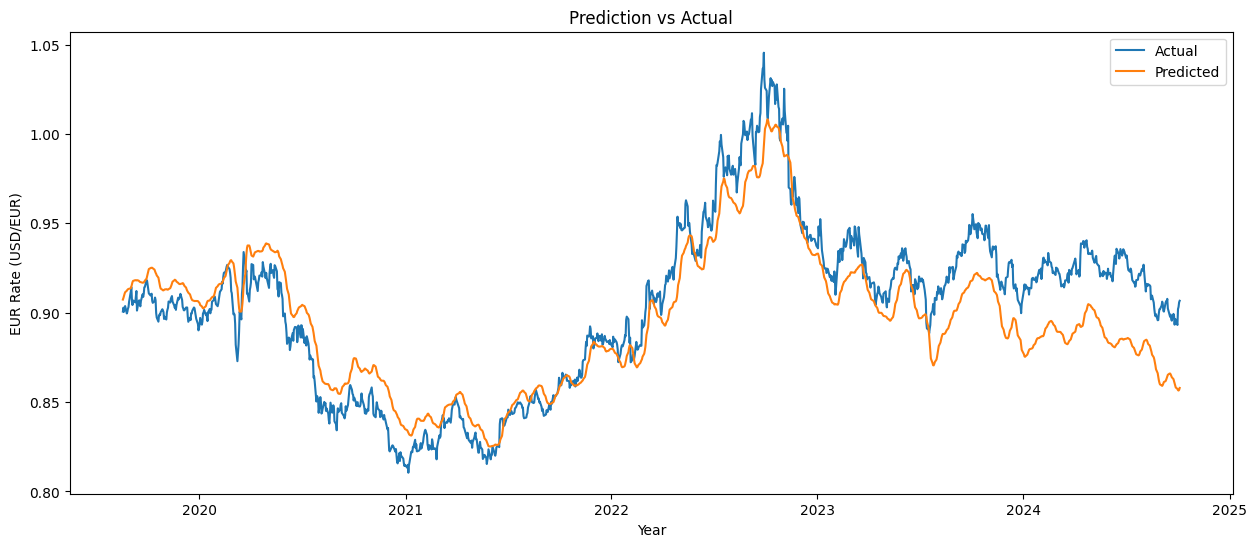

In [471]:
#Plotting predicted and actual values
plt.figure(figsize=(15, 6))
plt.plot(data.index[-1318:], TrueValue, label='Actual')
plt.plot(data.index[-1318:], predictedValue, label='Predicted')
plt.title('Prediction vs Actual')
plt.xlabel('Year')
plt.ylabel('EUR Rate (USD/EUR)')
plt.legend()
plt.show()

In [473]:
#Evaluating the LSTM model by calculating errors
mae = mean_absolute_error(test_y, LSTMprediction)
mse = mean_squared_error(test_y, LSTMprediction)
rmse = np.sqrt(mean_absolute_error(test_y, LSTMprediction))

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.029740372794935035
Mean Squared Error (MSE): 0.0013082032112169432
Root Mean Squared Error (RMSE): 0.17245397297521167


## **Random Forest Model**

### USD to JPY (Japanese Yen)

In [474]:
#ds = data.iloc[::-1].reset_index(drop=True)  # Reverse the dataset
ds = data.copy()
ds['JPY'] = pd.to_numeric(ds['JPY'], errors='coerce')

In [418]:
# Convert the "Date" column to datetime and set it as the index
#ds['Date'] = pd.to_datetime(ds['Date'])
#ds.set_index('Date', inplace=True)

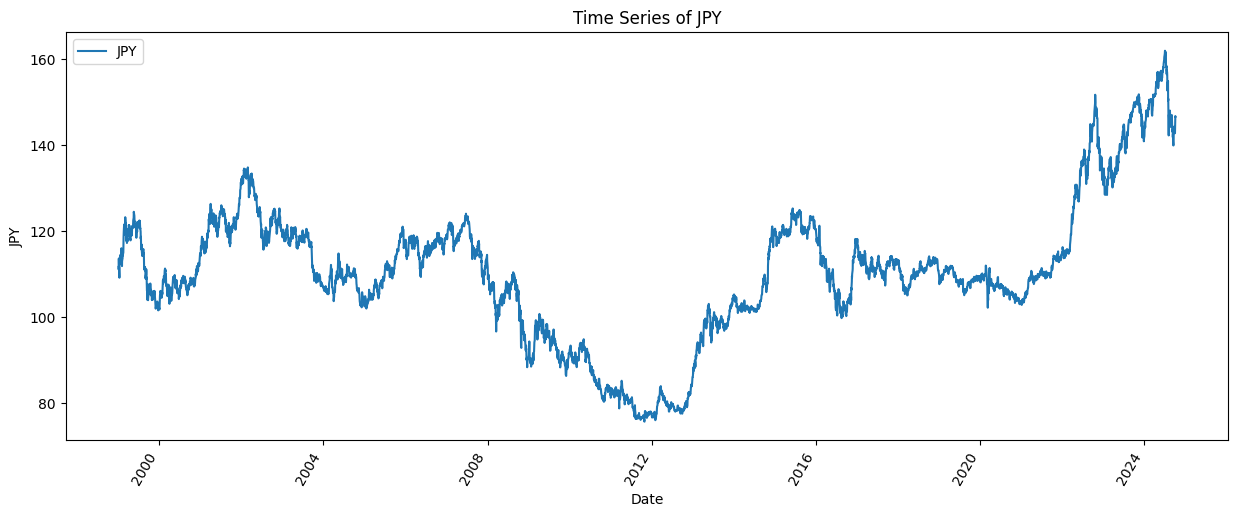

In [419]:
currency = "JPY"
ds.plot.line(y=currency, use_index=True)
plt.xticks(rotation=60)
plt.figsize=(10, 6)
plt.xlabel('Date')
plt.ylabel(currency)
plt.title(f'Time Series of {currency}')
plt.show()

In [420]:
ds= ds[['JPY']]

In [421]:
ds['previousDayRate']=ds['JPY'].shift(+1)
ds['twoDaysEarlierRate']=ds['JPY'].shift(+2)
ds['threeDaysEarlierRate']=ds['JPY'].shift(+3)
ds=ds.dropna()
ds.head()

<ipython-input-421-5610edb7bae5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-421-5610edb7bae5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-421-5610edb7bae5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,JPY,previousDayRate,twoDaysEarlierRate,threeDaysEarlierRate
Date,,,,
1999-01-07,111.270633,111.913480,111.077184,113.436254
1999-01-08,111.579038,111.270633,111.913480,111.077184
1999-01-11,109.196992,111.579038,111.270633,111.913480
1999-01-12,112.526042,109.196992,111.579038,111.270633
1999-01-13,112.304155,112.526042,109.196992,111.579038


In [430]:
#creating Model
RandomForest = RandomForestRegressor(n_estimators=100,max_features=2, random_state=1)

In [431]:
x1, x2, x3, y = ds['previousDayRate'],ds['twoDaysEarlierRate'],ds['threeDaysEarlierRate'],ds['JPY']

x1, x2, x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

x1, x2, x3, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)

X = np.concatenate((x1,x2,x3),axis=1)  #concatination of x1, x2, x3

print(X.shape)

(6595, 3)


In [441]:
#test-train split: Here last 30 samples used for testing and rest of them for training.
X_train, X_test, Y_train, Y_test = X[:-500], X[-500:], y[:-500], y[-500:]

In [448]:
RandomForest.fit(X_train,Y_train)
RFprediction = RandomForest.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



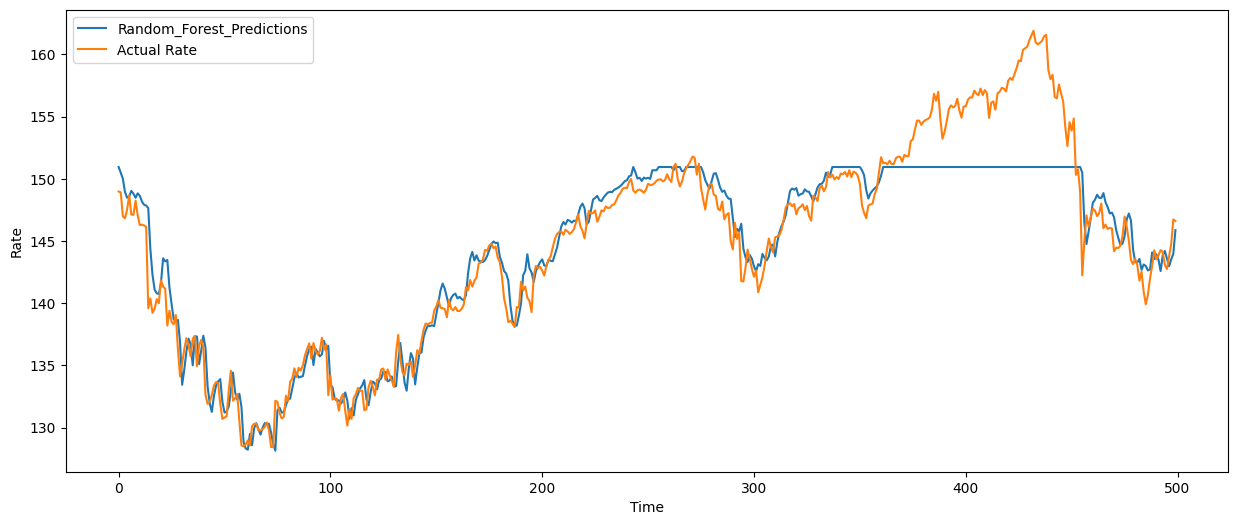

In [449]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(RFprediction,label='Random_Forest_Predictions')
plt.plot(Y_test,label='Actual Rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend(loc="upper left")
plt.show()

In [451]:
rmse = np.sqrt(mean_squared_error(RFprediction,Y_test))
print('Root Mean Squared Error (RMSE):',(rmse) )

Root Mean Squared Error (RMSE): 2.8421752095605055


**References**

Data: https://data.humdata.org/dataset/ecb-fx-rates?force_layout=desktop

Various Python libraries used, including TensorFlow, Prophet, and Scikit-learn.

**Note:** \\

The European Central Bank (ECB) keep updates this dataset daily basis. Download the updated dataset and use in the model.

